# Dengue prediction and Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [2]:
import pandas as pd
import seaborn as sns

## read data

In [3]:
data=pd.read_csv("C:/Users/Project_Work_User/Downloads/dengue dataset.csv")

## top 5 rows

In [4]:
data.head()

,id,fever,vomiting,nausea,vomiting_blood,body_pains,pain_behind_eyes,joint_pains,chill,headache,swollen_glands,rashes,abdominal_pain,ble_nose,ble_mouth,fatigue,red_eyes,platelets_count,dengue
0,1,102.5,no,no,no,yes,no,no,yes,yes,no,yes,no,no,no,yes,no,290000,no
1,2,101.8,no,no,no,low,no,no,no,yes,no,no,no,no,no,no,no,256000,no
2,3,101.8,yes,no,no,low,no,no,yes,yes,no,no,no,no,no,yes,yes,165000,no
3,4,100.9,no,no,no,yes,no,no,yes,yes,no,yes,no,yes,no,yes,no,168000,no
4,5,103.4,yes,yes,yes,high,yes,medium,yes,medium,yes,no,yes,yes,no,yes,no,6800,yes


In [5]:
data.drop(columns={'id'},inplace=True)

In [6]:
get={'yes':1,'medium':1,'no':0,'high':2,'low':0}


In [7]:
data.columns

Index(['fever', 'vomiting', 'nausea', 'vomiting_blood', 'body_pains',
       'pain_behind_eyes', 'joint_pains', 'chill', 'headache',
       'swollen_glands', 'rashes', 'abdominal_pain', 'ble_nose', 'ble_mouth',
       'fatigue', 'red_eyes', 'platelets_count', 'dengue'],
      dtype='object')

## data cleaning

In [8]:
data.describe()

,fever,platelets_count
count,224.000000,224.000000
mean,102.875000,94373.660714
std,1.347311,88933.861584
min,99.200000,6000.000000
25%,101.900000,9880.000000
50%,103.300000,55950.000000
75%,103.900000,170000.000000
max,105.600000,340000.000000


In [9]:
data.vomiting=data.vomiting.map(get)
data.nausea=data.nausea.map(get)
data.vomiting_blood=data.vomiting_blood.map(get)
data.body_pains=data.body_pains.map(get)
data.pain_behind_eyes=data.pain_behind_eyes.map(get)
data.joint_pains=data.joint_pains.map(get)
data.chill=data.chill.map(get)
data.headache=data.headache.map(get)
data.swollen_glands=data.swollen_glands.map(get)
data.rashes=data.rashes.map(get)
data.abdominal_pain=data.abdominal_pain.map(get)
data.ble_nose=data.ble_nose.map(get)
data.ble_mouth=data.ble_mouth.map(get)
data.fatigue=data.fatigue.map(get)
data.red_eyes=data.red_eyes.map(get)
data.dengue=data.dengue.map(get)

In [10]:
data=data[:225]

In [11]:
data.head()

,fever,vomiting,nausea,vomiting_blood,body_pains,pain_behind_eyes,joint_pains,chill,headache,swollen_glands,rashes,abdominal_pain,ble_nose,ble_mouth,fatigue,red_eyes,platelets_count,dengue
0,102.5,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,290000,0
1,101.8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,256000,0
2,101.8,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,165000,0
3,100.9,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,168000,0
4,103.4,1,1,1,2,1,1,1,1,1,0,1,1,0,1,0,6800,1


In [12]:

data_n = data[data['dengue'] == 0]
data_y = data[data['dengue'] == 1]

c=0
for i in data.dengue:
    if i==1:
        c=c+1
score=c/data.shape[0]
print('the bechmark model accuarcy score  {}%'.format(score*100))

the bechmark model accuarcy score  35.714285714285715%


## data visualization

In [13]:
import matplotlib.pyplot as plt

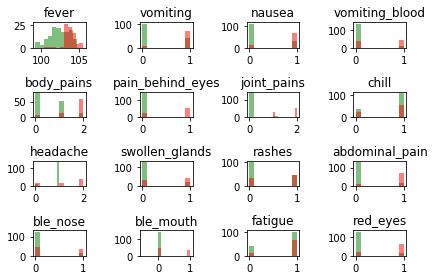

In [14]:

# Instantiate figure object
fig = plt.figure()
#plt.sup_title('Tumor Characteristic (means)')

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(data.columns[0:16])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(4,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(data_n[b], label = 'Negative', stacked = True, alpha=0.5, color= 'g')
    ax.hist(data_y[b], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)



plt.tight_layout()
#plt.legend()
plt.show()   

## heat map generation

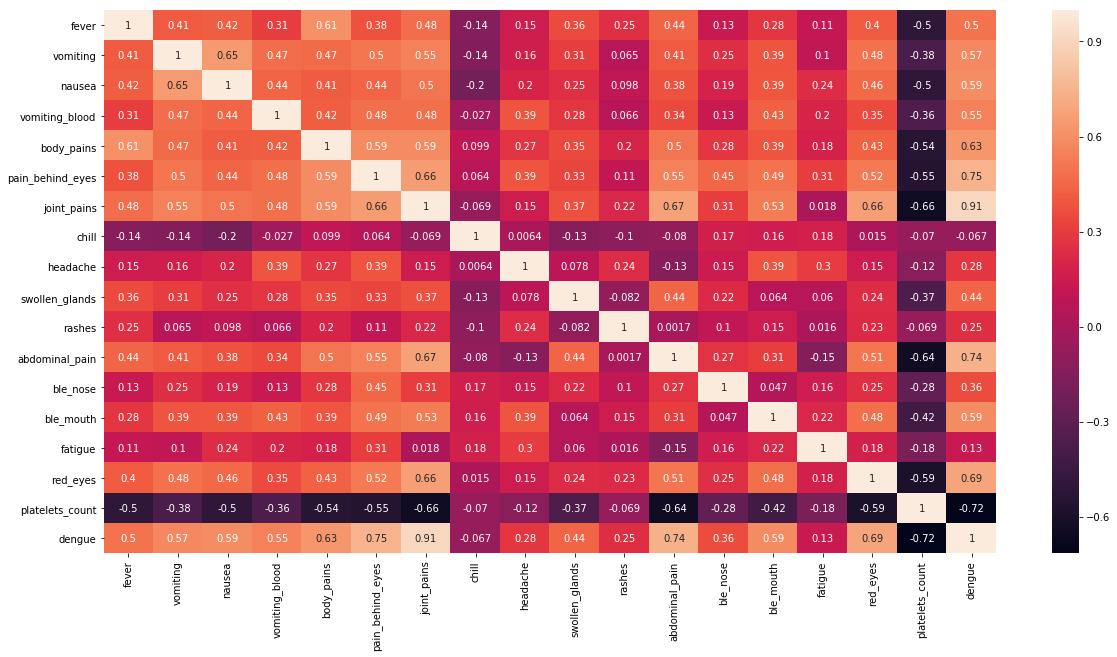

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)


## Data Modeling

In [16]:
## to split the data into ratio of 75% and 25% to train model and test the model

from sklearn.model_selection import train_test_split

new_data=data.drop(columns={'dengue'})
X_train,X_test,y_train,y_test=train_test_split(new_data,data['dengue'],random_state=7)

In [ ]:
#The data is preprocessing using sklearn.preprocessing.Normalizer
from sklearn.preprocessing import Normalizer

norm=Normalizer()
X_train_normal=norm.transform(X_train)
X_test_normal=norm.transform(X_test)

### Hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


RF_params = {'n_estimators':[10,50,100]}
DTC_params = {'criterion':['entropy'], 'max_depth':[10, 50, 100]}
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
from sklearn.model_selection import GridSearchCV
models=[]

models.append(('DTC', DecisionTreeClassifier(), DTC_params))

models.append(('LR', LogisticRegression(), LR_params))

In [ ]:
from tqdm import tqdm
results=[]
names=[]
scoring='accuracy' 
for name, model, params in tqdm(models):
    kfold = KFold(len(X_train_normal), random_state=7, shuffle=True)
    model_grid = GridSearchCV(model, params)
    cv_results = cross_val_score(model_grid, X_train_normal, y_train, cv = kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "Cross Validation Accuracy %s: Accarcy: %f SD: %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

### White Grid Plot

In [ ]:
plt.boxplot(results, labels = names)
plt.title('Dengue Diagnosis Performance using Machine Learning ')
plt.ylabel('Model Accuracy %')
sns.set_style("whitegrid")
plt.show()

### Accuracy

In [ ]:
#The accuracy score obtained without using GridSearchCV

from sklearn.metrics import make_scorer, accuracy_score, fbeta_score

clf=RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_normal,y_train)
pred=clf.predict(X_test_normal)
accuracy_score(pred,y_test)
print(pred)

### Data metric evaluation

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, fbeta_score

clf = DecisionTreeClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune
parameters = {'criterion':['entropy'], 'max_depth':[10, 50, 100]}

# TODO: Make an fbeta_score scoring object


# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf,parameters,scoring='accuracy')

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train_normal,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train_normal, y_train)).predict(X_test_normal)
best_predictions = best_clf.predict(X_test_normal)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

###  Confusion Matrix and Classification report

In [ ]:
print(best_predictions)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

matrix=confusion_matrix(pred,y_test)
matrix=pd.DataFrame(matrix,columns=['Predicted Negative','Predicted Postive'],index=['Actual Negative','Actual Positive'])
print(matrix)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(best_predictions,y_test))

In [ ]:
data.shape

In [ ]:
train=data[:,:18]
train_o=data[:,18]

In [ ]:

A=best_clf.predict([102.5,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,290000])
print(A)

In [17]:
new_data=data.drop(columns={'dengue'})
X_train,X_test,y_train,y_test=train_test_split(new_data,data['dengue'],random_state=7)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC_params = {'criterion':['entropy'], 'max_depth':[10, 50, 100]}

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Project_Work_User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
A=model.predict([102.5,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,290000])
print(A)

ValueError: Expected 2D array, got 1D array instead:
array=[1.025e+02 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 1.000e+00 1.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 0.000e+00 2.900e+05].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.